In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [53]:
# user id and names
users = [
 { "id": 0, "name": "Hero" },
 { "id": 1, "name": "Dunn" },
 { "id": 2, "name": "Sue" },
 { "id": 3, "name": "Chi" },
 { "id": 4, "name": "Thor" },
 { "id": 5, "name": "Clive" },
 { "id": 6, "name": "Hicks" },
 { "id": 7, "name": "Devin" },
 { "id": 8, "name": "Kate" },
 { "id": 9, "name": "Klein" }
]


### User Interests
interests = [
 (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
 (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
 (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
 (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
 (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
 (3, "statistics"), (3, "regression"), (3, "probability"),
 (4, "machine learning"), (4, "regression"), (4, "decision trees"),
 (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
 (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
 (6, "probability"), (6, "mathematics"), (6, "theory"),
 (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
 (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
 (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
 (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]
# friendship pairs for each user 
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
 (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

# {user: list of friends}
friendships = {user["id"]: set() for user in users}
for i, j in friendship_pairs:
    friendships[i].add(j)
    friendships[j].add(i)

In [54]:
# Well networked data scientists - the one having the most number of friends
count_friends = [(uid, len(friendships[uid])) for uid in friendships]
count_friends.sort(key=lambda uidcount: uidcount[1], reverse=True)
count_friends[0]

(1, 3)

In [76]:
### Data Scientists you may know ###
def data_scientists_you_may_know(user_id):
    all_friends = set()
    for fid in friendships[user_id]:
        all_friends = all_friends.union(friendships[fid])
    you_may_know = all_friends.difference(friendships[user_id]).difference({user_id})
    return you_may_know

data_scientists_you_may_know(3)

{0, 5}

In [84]:
interest_user_index = dict()
user_interest_index = dict()
for tup in interests:
    if interest_user_index.get(tup[1], None) is None:
        interest_user_index[tup[1]] = set([tup[0]])
    else:
        interest_user_index[tup[1]].add(tup[0])
        
    if user_interest_index.get(tup[0], None) is None:
        user_interest_index[tup[0]] = set([tup[1]])
    else:
        user_interest_index[tup[0]].add(tup[1])

In [85]:
### Data scientists who like ###
def data_scientists_who_like(target_interest):
    return interest_user_index[target_interest]

data_scientists_who_like("scikit-learn")

{2, 7}

In [105]:
def most_common_interests_with(user_id):
    ci_user_ids = []
    for uid in user_interest_index:
        if uid != user_id:
            ci = user_interest_index[user_id].intersection(user_interest_index[uid])
            len_ci = len(ci)
            ci_user_ids.append((uid, len_ci, ci))
    ci_user_ids.sort(key=lambda temp: temp[1], reverse=True)
    return ci_user_ids[0]
    
most_common_interests_with(7)
# output: (user_id, length_of_coomon_interest, common_interests)

(2, 1, {'scikit-learn'})

In [150]:
### Most popular topic ###
# top 3 most popuar topics
def most_popular_topic():
    topic_users = [(topic, len(count)) for topic, count in interest_user_index.items()]
    topic_users.sort(key=lambda s: s[1], reverse=True)
    return topic_users[:3]
most_popular_topic()

[('Big Data', 3), ('Java', 3), ('Python', 3)]

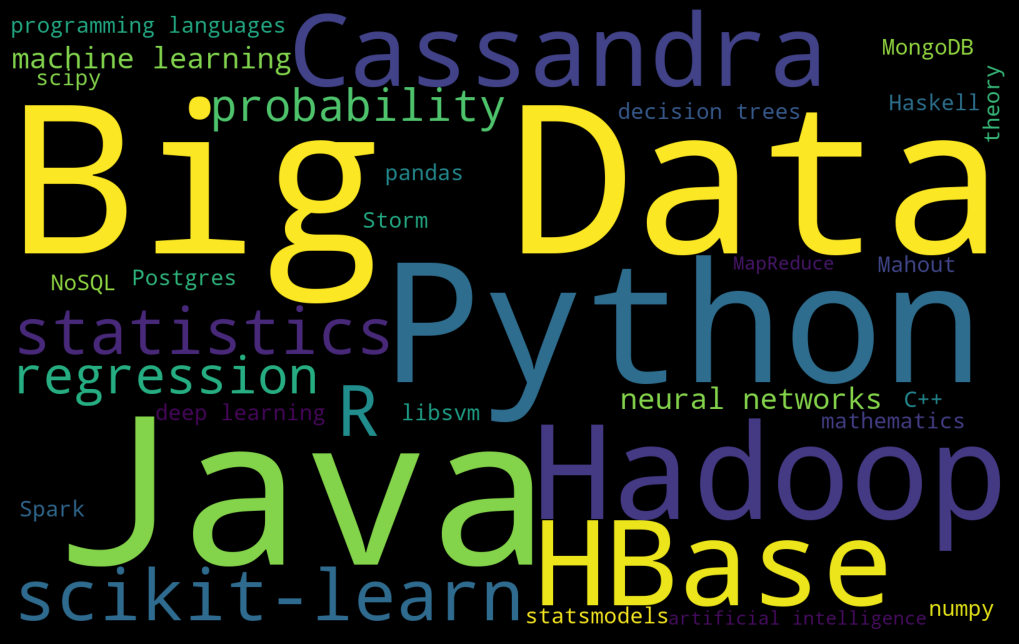

In [151]:
# Generating wordcloud for topics. More the size means more number of times the word came.
words = {topic: len(interest_user_index[topic]) for topic in interest_user_index}
# print(words)
wordcloud = WordCloud(width = 1600, height = 1000,
                min_font_size = 1, relative_scaling = 0.5)
wordcloud.generate_from_frequencies(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 7), facecolor = "k")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
# plt.show()
plt.savefig('output/ch1_wordcloud.png')